In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time
from sklearn import preprocessing as pre

In [14]:
df=pd.read_csv('merge2.csv')
df.head(25)

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2
5,5,2f5d62b,b,dc52510,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,...,0.513,0.233,0.097,0.090547,0.179104,0.235821,0.494527,12.632218,6.101172,4191
6,6,2406c8b,a,f93b51e,18330.0,2256.0,30.415,522.0,29778.0,88617.0,...,0.511,0.251,0.188,0.222555,0.410180,0.244511,0.122754,13.568595,11.598960,24
7,7,801bf91,a,56f170e,185248.0,13778.0,18.446,953.0,91954.0,255951.0,...,0.501,0.279,0.111,0.033932,0.204591,0.243513,0.517964,11.188855,5.840394,225
8,8,82dbbf7,b,a972798,46558.0,4382.0,23.017,674.0,48484.0,124230.0,...,0.506,0.259,0.155,0.154154,0.405405,0.256256,0.184184,11.588893,10.033765,93
9,9,23c3967,b,a8981de,27319.0,2543.0,21.691,617.0,35375.0,78601.0,...,0.516,0.259,0.148,0.204795,0.391608,0.276723,0.126873,12.477718,10.476918,6


In [16]:
x=df.rucc.unique()
y=df['rucc'].groupby(df.rucc).count()

print(y)

rucc
Completely rural     580
Metro                906
Urban               1058
Name: rucc, dtype: int64


In [15]:
rucc_categories = {'Metro - Counties in metro areas of 1 million population or more':'Metro', 'Metro - Counties in metro areas of 250,000 to 1 million population':'Metro', 'Metro - Counties in metro areas of fewer than 250,000 population':'Metro', 
                    'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area':'Completely rural', 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area':'Completely rural',
                    'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area':'Urban ', 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area':'Urban ', 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area':'Urban ', 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area':'Urban '}
df['rucc'] = [rucc_categories[x] for x in df['rucc']]
df['rucc'].value_counts()

Urban               1058
Metro                906
Completely rural     580
Name: rucc, dtype: int64

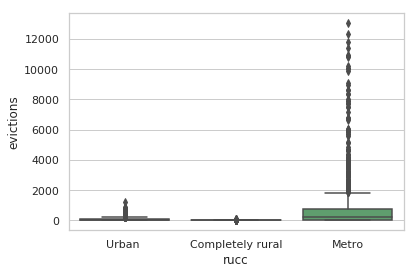

In [17]:
def plot_box(df, col, col_y = 'evictions'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'rucc') 

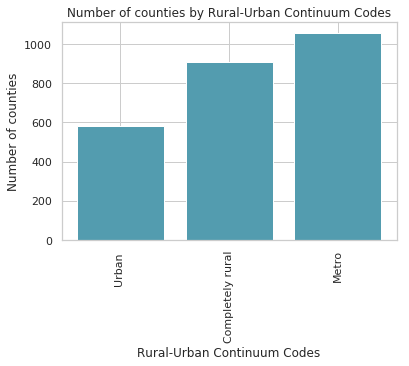

In [18]:
def barplot(x_data, y_data, 
            #error_data, 
            x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    #ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    plt.xticks(rotation=90)
    ax.set_title(title)
barplot(x,y,x_label="Rural-Urban Continuum Codes", y_label="Number of counties", title="Number of counties by Rural-Urban Continuum Codes")

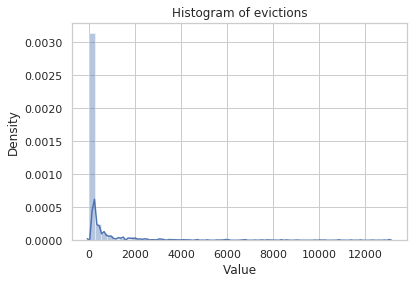

In [19]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(df['evictions'], 'evictions')

In [20]:
a=df.urban_influence.unique()
s=df['urban_influence'].groupby(df.urban_influence).count()

print(s)

urban_influence
Large-in a metro area with at least 1 million residents or more                                       356
Micropolitan adjacent to a large metro area                                                            98
Micropolitan adjacent to a small metro area                                                           201
Micropolitan not adjacent to a metro area                                                             197
Noncore adjacent to a large metro area                                                                131
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             146
Noncore adjacent to a small metro with town of at least 2,500 residents                               270
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          174
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                158
Noncore not adjacent to a metr

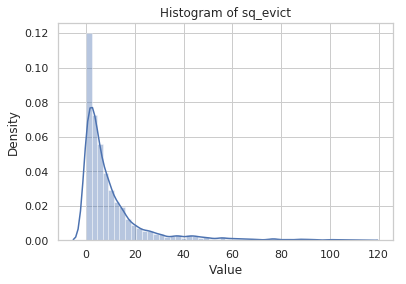

In [21]:
df['sq_evict'] = np.sqrt(df['evictions'])
hist_plot(df['sq_evict'], 'sq_evict')

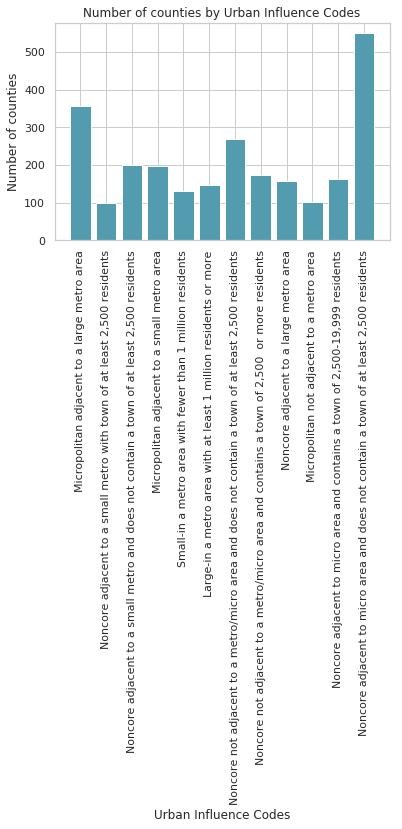

In [22]:
barplot(a,s,x_label="Urban Influence Codes", y_label="Number of counties", title="Number of counties by Urban Influence Codes")

In [13]:
df.drop(["evictions"], axis=1, inplace=True)

In [64]:
df.drop(["row_id","county_code","state"], axis=1, inplace=True)
df.pct_adult_smoking = df.pct_adult_smoking.fillna(df.pct_adult_smoking.mean())
df.pct_low_birthweight = df.pct_low_birthweight.fillna(df.pct_low_birthweight.mean())
df.pct_excessive_drinking = df.pct_excessive_drinking.fillna(df.pct_excessive_drinking.mean())
df.homicides_per_100k = df.homicides_per_100k.fillna(df.homicides_per_100k.mean())
df.motor_vehicle_crash_deaths_per_100k = df.motor_vehicle_crash_deaths_per_100k.fillna(df.motor_vehicle_crash_deaths_per_100k.mean())
df.pop_per_dentist = df.pop_per_dentist.fillna(df.pop_per_dentist.mean())
df.pop_per_primary_care_physician = df.pop_per_primary_care_physician.fillna(df.pop_per_primary_care_physician.mean())
#df.median_property_value = df.median_property_value.fillna(df.median_property_value.median())
#df.median_household_income = df.median_household_income.fillna(df.median_household_income.median())
#df.air_pollution_particulate_matter_value = df.air_pollution_particulate_matter_value.fillna(df.air_pollution_particulate_matter_value.median())
columns = ["rucc", "urban_influence", "economic_typology","year"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,0.070193,...,0,0,0,0,0,0,1,0,0,1
1,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,0.037419,...,0,0,0,0,0,0,1,0,1,0
2,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,0.046922,...,0,0,0,0,0,0,0,1,0,1
3,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,0.081067,...,0,0,0,0,0,0,1,0,1,0
4,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,0.035753,...,0,1,0,1,0,0,0,0,1,0
5,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,0.076131,...,0,0,0,0,0,0,1,0,0,1
6,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,0.017288,...,0,0,1,0,0,0,0,0,1,0
7,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,0.023532,...,0,0,0,0,0,0,1,0,1,0
8,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,0.092045,...,0,0,0,0,1,0,0,0,0,1
9,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,0.017676,...,0,1,0,0,0,0,1,0,0,1


In [65]:
ev = df['sq_evict']
df.drop(labels=['sq_evict'], axis=1,inplace = True)
df.insert(0, 'sq_evict', ev)
df.head()

,sq_evict,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,26.095977,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
1,0.000000,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0,0,0,0,0,0,1,0,1,0
2,5.385165,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0,0,0,0,0,0,0,1,0,1
3,29.000000,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
4,1.414214,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0,1,0,1,0,0,0,0,1,0


In [66]:
df.dropna(axis = 0, inplace = True)
df

,sq_evict,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,26.095977,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0,0,0,0,0,0,1,0,0,1
1,0.000000,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0,0,0,0,0,0,1,0,1,0
2,5.385165,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0,0,0,0,0,0,0,1,0,1
3,29.000000,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0,0,0,0,0,0,1,0,1,0
4,1.414214,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0,1,0,1,0,0,0,0,1,0
5,64.737933,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,...,0,0,0,0,0,0,1,0,0,1
6,4.898979,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,...,0,0,1,0,0,0,0,0,1,0
7,15.000000,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,...,0,0,0,0,0,0,1,0,1,0
8,9.643651,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,...,0,0,0,0,1,0,0,0,0,1
9,2.449490,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,...,0,1,0,0,0,0,1,0,0,1


In [94]:
# Extract the training and test data
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape 

(1777, 64)

In [96]:
model = RandomForestRegressor(n_jobs=-1,n_estimators=35)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

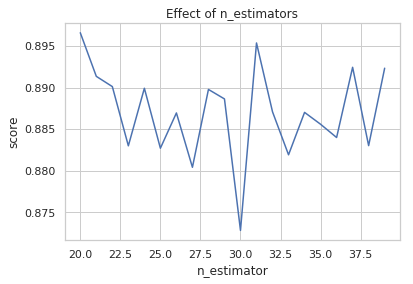

In [70]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(20, 40, 1)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [30]:
scores

[0.8609733102239162,
 0.8857764626565716,
 0.8739678534567352,
 0.8923749238577388,
 0.8755163747403221,
 0.8880656462362528,
 0.8964002124270624,
 0.880389505558022,
 0.8921607728300495,
 0.8947947355988441,
 0.8905072250565499,
 0.8888268465130135,
 0.8901916516156463,
 0.8836746561911858,
 0.8947327843371019,
 0.8917765931820005,
 0.8892065207053931,
 0.8969084631106432,
 0.8974104342492236,
 0.8969230040146837]

In [97]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = model.predict(X_test) 
print_metrics(y_test, y_score, 1) 

Mean Square Error      = 29.255135984801445
Root Mean Square Error = 5.408801714317271
Mean Absolute Error    = 2.7297093211054575
Median Absolute Error  = 1.169518248013624
R^2                    = 0.8787849087331187
Adjusted R^2           = 0.8787849087331187


In [109]:
print(y_test)

[ 34.07345007   4.35889894   0.           3.46410162   4.
   1.           6.164414     1.41421356  12.28820573  28.39013913
   9.69535971  14.89966443   3.74165739  10.44030651   2.82842712
   1.          13.3041347    2.64575131   3.31662479   0.
  17.08800749  10.67707825  25.96150997   1.          15.39480432
   9.48683298  24.55605832   2.64575131  19.02629759   1.
   3.74165739  11.5758369   10.86278049  20.90454496   5.65685425
   3.74165739  12.24744871   7.61577311  24.35159132   3.60555128
   2.23606798   5.           1.73205081   6.4807407    4.89897949
   0.           8.66025404   0.           0.           0.
   3.           3.           9.59166305   4.47213595   9.89949494
  56.32051136   5.19615242   3.46410162   2.44948974   1.
   6.244998     0.           2.23606798   1.          27.
   3.          20.51828453   2.           2.82842712  20.4450483
  21.23676058   6.08276253  10.39230485   4.58257569   9.43398113
   6.244998     8.94427191   9.79795897   2.82842712   8.42

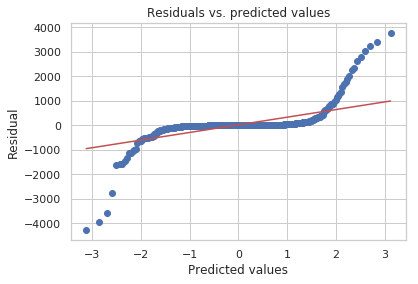

In [98]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(np.square(y_test), np.square(y_score))

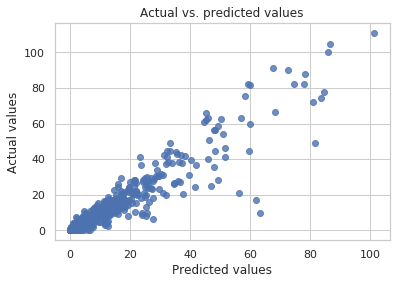

In [99]:
import seaborn as sns
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, y_test, fit_reg=False)
    plt.title('Actual vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')

resid_plot(y_test, y_score) 

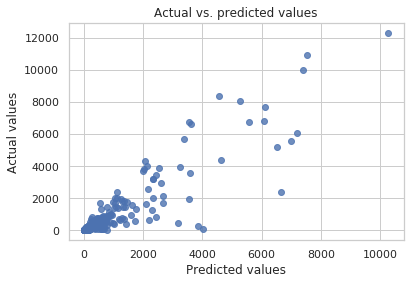

In [100]:
import seaborn as sns
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, y_test, fit_reg=False)
    plt.title('Actual vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')

resid_plot(np.square(y_test), np.square(y_score))

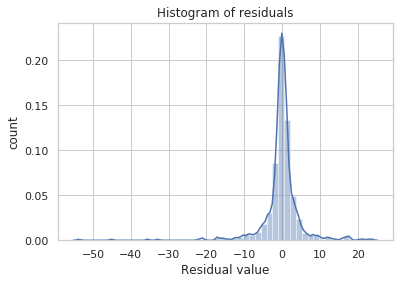

In [101]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

In [102]:
test1 = pd.read_csv("test_values.csv")
test1.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,a110aae,a,37520b7,171046.0,17342.0,25.310,672.0,42828.0,99353.0,...,1399.0,0.509,0.239,0.149,0.112450,0.346386,0.357430,0.183735,12.238462,9.983245
1,1,daa811a,b,3c7c507,114518.0,13776.0,29.492,657.0,53712.0,149404.0,...,1790.0,0.497,0.234,0.154,0.089357,0.366466,0.311245,0.232932,10.213609,8.902167
2,2,04b5074,a,3c7c507,4452.0,317.0,13.208,506.0,48642.0,140740.0,...,1490.0,0.481,0.161,0.247,0.088176,0.395792,0.345691,0.170341,4.697987,10.514541
3,3,261a880,b,be99678,16883.0,1703.0,29.757,786.0,40827.0,139862.0,...,1510.0,0.501,0.236,0.200,0.130261,0.379760,0.330661,0.159319,11.168180,12.601529
4,4,3f91d56,b,26926ff,71393.0,7974.0,30.864,650.0,44688.0,103120.0,...,2419.0,0.526,0.246,0.150,0.129611,0.354935,0.334995,0.180459,12.941045,11.066342


In [103]:
test1['rucc'] = [rucc_categories[x] for x in test1['rucc']]
test1['rucc'].value_counts()

Urban               1033
Metro                915
Completely rural     472
Name: rucc, dtype: int64

In [104]:
test1 = test1.fillna(0)

In [105]:
test1.drop(["row_id","county_code","state"], axis=1, inplace=True)
#test1.pct_adult_smoking = test1.pct_adult_smoking.fillna(0)
#test1.pct_low_birthweight = test1.pct_low_birthweight.fillna(0)
#test1.pct_excessive_drinking = test1.pct_excessive_drinking.fillna(0)
#test1.homicides_per_100k = test1.homicides_per_100k.fillna(0)
#test1.motor_vehicle_crash_deaths_per_100k = test1.motor_vehicle_crash_deaths_per_100k.fillna(0)
#test1.pop_per_dentist = test1.pop_per_dentist.fillna(0)
#test1.pop_per_primary_care_physician = test1.pop_per_primary_care_physician.fillna(0)
test1.median_gross_rent = test1.median_gross_rent.fillna(0)
#df.median_household_income = df.median_household_income.fillna(df.median_household_income.median())
test1.air_pollution_particulate_matter_value = test1.air_pollution_particulate_matter_value.fillna(0)

#test1.drop(["pct_adult_smoking","pct_low_birthweight","pct_excessive_drinking","homicides_per_100k","motor_vehicle_crash_deaths_per_100k","pop_per_dentist","pop_per_primary_care_physician"], axis=1, inplace=True)

columns = ["rucc", "urban_influence", "economic_typology","year"]
test1 = pd.get_dummies(test1, columns=columns)
test1.head(10)

,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,171046.0,17342.0,25.310,672.0,42828.0,99353.0,34.738,0.768640,0.136740,0.051869,...,0,1,0,0,1,0,0,0,1,0
1,114518.0,13776.0,29.492,657.0,53712.0,149404.0,25.108,0.859299,0.014054,0.058939,...,0,1,0,0,1,0,0,0,0,1
2,4452.0,317.0,13.208,506.0,48642.0,140740.0,25.072,0.976854,0.002000,0.010068,...,0,0,0,0,0,0,0,1,1,0
3,16883.0,1703.0,29.757,786.0,40827.0,139862.0,30.767,0.883453,0.000000,0.080657,...,0,1,0,0,0,0,1,0,0,1
4,71393.0,7974.0,30.864,650.0,44688.0,103120.0,27.092,0.732230,0.028232,0.047745,...,0,0,0,0,0,0,1,0,0,1
5,120494.0,13474.0,27.898,720.0,47860.0,94634.0,32.304,0.945367,0.007736,0.023179,...,0,1,0,0,0,0,1,0,0,1
6,8309.0,739.0,26.231,572.0,39405.0,73843.0,21.282,0.734904,0.162135,0.072467,...,0,0,0,1,0,0,0,0,1,0
7,94994.0,6731.0,19.624,949.0,86323.0,268922.0,27.933,0.900692,0.011324,0.040355,...,0,0,0,0,1,0,0,0,1,0
8,411859.0,50689.0,30.689,715.0,42326.0,89254.0,34.066,0.724933,0.202547,0.032176,...,0,1,0,0,0,0,1,0,1,0
9,25037.0,3070.0,33.433,583.0,32913.0,63992.0,27.749,0.826291,0.107505,0.046048,...,0,0,0,0,1,0,0,0,1,0


In [117]:
test = scaler.transform(test1)

In [118]:
outcome = model.predict(test) 


In [119]:
print(outcome)

[21.45407886 13.32645165  0.83630641 ... 25.43488064 16.16728814
 18.13122118]


In [120]:
np.savetxt("hz.csv", outcome, delimiter=",")

In [ ]:
d=df.economic_typology.unique()
f=df['economic_typology'].groupby(df.economic_typology).count()

print(f)

In [ ]:
barplot(d,f,x_label="County Typology Codes", y_label="Number of counties", title="Number of counties by County Typology Codes")

In [ ]:
q=df.year.unique()
w=df['year'].groupby(df.year).count()

print(w)

In [ ]:
import seaborn as sns; sns.set()
g = sns.pairplot(df, vars=["evictions", "renter_occupied_households","pct_renter_occupied","pct_adults_with_high_school_diploma"])

In [ ]:
h = sns.pairplot(df, vars=["evictions", "pct_asian","median_gross_rent","pct_adults_bachelors_or_higher","pct_af_am", "pct_other"])

In [ ]:
j = sns.pairplot(df, vars=["evictions", "birth_rate_per_1k","median_property_value","homicides_per_100k","rent_burden", "median_household_income"])

In [ ]:
k = sns.pairplot(df, vars=["evictions", "pct_female","pct_below_18_years_of_age","pct_civilian_labor","pct_multiple", "pct_low_birthweight"])

In [ ]:
aa = sns.pairplot(df, vars=["evictions", "pct_uninsured_adults","poverty_rate","pct_nh_pi","pct_excessive_drinking", "pct_unemployment"])

In [ ]:
ab = sns.pairplot(df, vars=["evictions", "pct_adults_with_some_college","air_pollution_particulate_matter_value","pct_uninsured_children","pct_am_ind", "pct_adults_less_than_a_high_school_diploma"])

In [ ]:
ac = sns.pairplot(df, vars=["evictions", "renter_occupied_households","pct_renter_occupied","median_gross_rent","pct_adults_bachelors_or_higher"], plot_kws=dict(s=40, edgecolor="None", linewidth=0.5, alpha=0.1))


In [ ]:
ad = sns.pairplot(df, vars=["evictions", "pct_physical_inactivity","pop_per_dentist","death_rate_per_1k","motor_vehicle_crash_deaths_per_100k", "pct_aged_65_years_and_older","pct_white","pct_adults_with_high_school_diploma"])


In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
import plotly.figure_factory as ff

corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

In [ ]:
import plotly.plotly as py
import plotly 
plotly.tools.set_credentials_file(username='kategree', api_key='LnGaUl28irjY7KxTL7aV')
py.iplot(figure, filename='annotated_heatmap')

In [ ]:
def plot_box(df, cols, col_x = 'evictions'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['rucc', 'urban_influence', 'economic_typology']
plot_box(df, num_cols)

In [ ]:
def plot_box(df, cols, col_x = 'urban_influence'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.xticks(rotation=90)
        plt.show()

num_cols = ['evictions']
plot_box(df, num_cols)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: Unrecognized marker style '~'

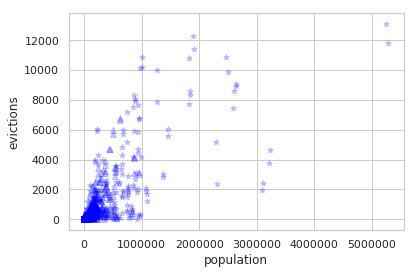

In [35]:
def plot_scatter_shape(df, cols, shape_col = 'urban_influence', col_y = 'evictions', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^','*','~','-','/'] # pick distinctive shapes
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['population','renter_occupied_households','pct_renter_occupied']
plot_scatter_shape(df, num_cols) 
#"rucc", "urban_influence", "economic_typology","year"